**Ant Colony System (ACS)**

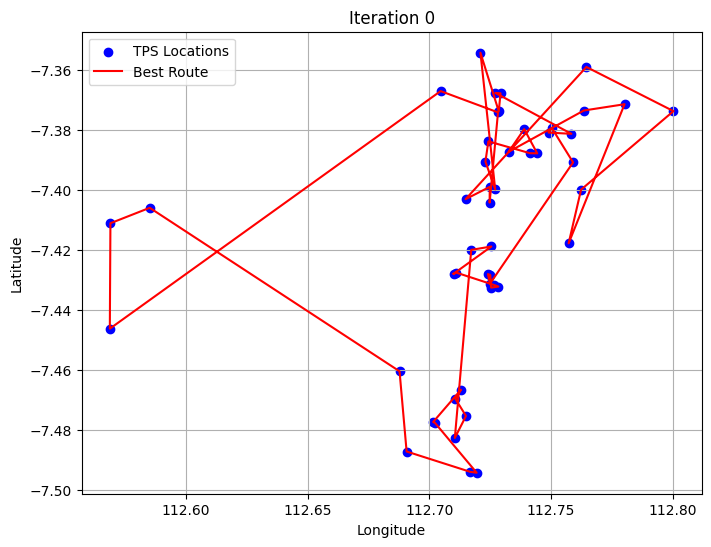

Iteration: 0 | Best Distance: 1.1496936307441201
Iteration: 10 | Best Distance: 1.0104313350348832
Iteration: 20 | Best Distance: 1.0104313350348832
Iteration: 30 | Best Distance: 1.0104313350348832
Iteration: 40 | Best Distance: 1.0104313350348832
Iteration: 50 | Best Distance: 1.0104313350348832
Iteration: 60 | Best Distance: 1.0104313350348832
Iteration: 70 | Best Distance: 1.0104313350348832
Iteration: 80 | Best Distance: 1.0104313350348832
Iteration: 90 | Best Distance: 1.0104313350348832


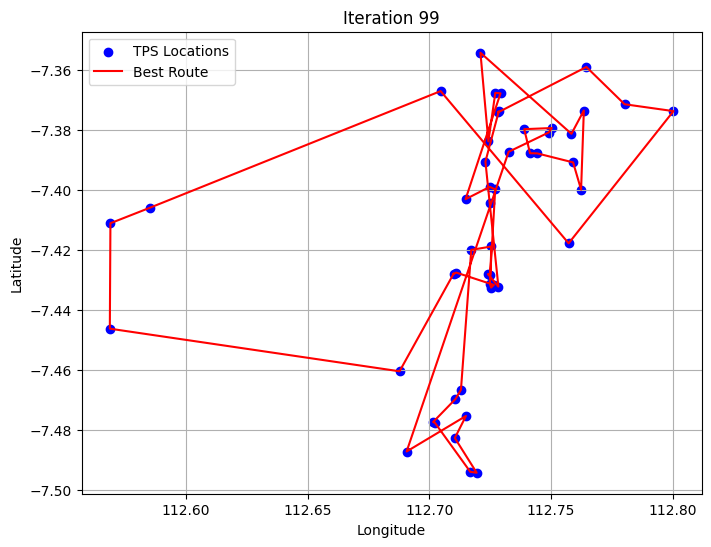

Best Distance: 1.0104313350348832
Best Route: ['Depot dummy', 'TPS Sidokerto Buduran', 'Jl. KH Khamdani Buduran', 'TPS Pondok Al-Ghozini Buduran', 'TPS Indomart Gedangan', 'TPS Sungai Seruni Gedangan', 'TPST Kebonsikep Gedangan', 'TPS Alloy Stell Gedangan', 'TPS Marinir Juanda Gedangan', 'TPS Desa Ketajen Gedangan', 'TPS SMA Negeri Gedangan', 'TPS Hair Star Gedangan', 'Sedati - TPS AURI', 'Sedati - Miskan TPS Bea Cukai Juanda', 'TPS Restoran Aloha Gedangan', 'TPS Aloha Gedangan', 'TPS Sawotratap Gedangan', 'TPS Makro Gedangan', 'TPS Gudang Garam Gedangan', 'TPS Taman Aloha Waru', 'TPS Perum Putri Juanda Waru', 'Sedati - Choirul Anan TPS Lesen', 'Sedati - TPS Jl. Raya Juanda', 'Sedati - TPS Pasar Wisata Juanda', 'Sedati - TPS Jl. Raya Tropodo', 'Sedati - TPS Bandara Juanda', 'Sedati - TPS Angkasapura', 'TPS Perum Surya Asri (Dapurno) Buduran', 'SMA Antartika Buduran', 'TPST Siwalanpanji Buduran', 'TPS SDN Siwalanpanji Buduran', 'SMP PGRI 1 Buduran', 'TPST PT Avian Buduran', 'TPS Sukorej

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.pheromone_evaporation_rate = pheromone_evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.tps_names = tps_names
        self.coordinates = coordinates
        self.num_nodes = len(coordinates)
        self.distances = self.calculate_distances()
        self.pheromone_matrix = np.ones((self.num_nodes, self.num_nodes))
        np.fill_diagonal(self.pheromone_matrix, 0)
        self.best_distance = float('inf')
        self.best_route = []

    def calculate_distances(self):
        distances = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                distances[i][j] = np.linalg.norm(self.coordinates[i] - self.coordinates[j])
        return distances

    def run(self):
        start_time = time.time()
        for iteration in range(self.num_iterations):
            ant_routes = []
            for ant in range(self.num_ants):
                route = self.generate_ant_route()
                ant_routes.append((route, self.calculate_route_distance(route)))

            self.update_pheromone(ant_routes)

            if iteration == 0:
                self.plot_route(iteration, ant_routes)
            elif iteration == self.num_iterations - 1:
                self.plot_route(iteration, ant_routes)

            if iteration % 10 == 0:
                print("Iteration:", iteration, "| Best Distance:", self.best_distance)

        print("Best Distance:", self.best_distance)
        print("Best Route:", self.best_route)
        end_time = time.time()
        print("Total Runtime:", end_time - start_time, "seconds")

    def plot_route(self, iteration, ant_routes):
        best_ant_route, _ = min(ant_routes, key=lambda x: x[1])
        best_route_coords = [self.coordinates[node] for node in best_ant_route]
        best_route_coords.append(self.coordinates[best_ant_route[0]])

        plt.figure(figsize=(8, 6))
        plt.scatter(self.coordinates[:, 1], self.coordinates[:, 0], c='blue', label='TPS Locations')
        plt.plot([coord[1] for coord in best_route_coords], [coord[0] for coord in best_route_coords],
                 c='red', linewidth=1.5, linestyle='-', label='Best Route')
        plt.title(f"Iteration {iteration}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.grid(True)
        plt.show()

    def generate_ant_route(self):
        start_node = start_node = 0  # Start from depot dummy
        unvisited_nodes = set(range(self.num_nodes))
        unvisited_nodes.remove(start_node)
        current_node = start_node
        route = [start_node]

        while unvisited_nodes:
            probabilities = self.calculate_probabilities(current_node, unvisited_nodes)
            next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
            route.append(next_node)
            unvisited_nodes.remove(next_node)
            current_node = next_node

        route.append(start_node)
        return route

    def calculate_probabilities(self, current_node, unvisited_nodes):
        pheromone_values = np.array([self.pheromone_matrix[current_node][i] for i in unvisited_nodes])
        distances = np.array([self.distances[current_node][i] for i in unvisited_nodes])
        heuristic_values = 1 / (distances + 1e-10)  # Add a small value to avoid division by zero
        probabilities = (pheromone_values ** self.alpha) * (heuristic_values ** self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    def calculate_route_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distances[route[i]][route[i + 1]]
        return distance

    def update_pheromone(self, ant_routes):
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                if i != j:
                    self.pheromone_matrix[i][j] *= (1 - self.pheromone_evaporation_rate)
                    for route, distance in ant_routes:
                        if (i in route) and (j in route):
                            self.pheromone_matrix[i][j] += 1 / distance

        best_ant_route, best_ant_distance = min(ant_routes, key=lambda x: x[1])
        if best_ant_distance < self.best_distance:
            self.best_distance = best_ant_distance
            self.best_route = [self.tps_names[node] for node in best_ant_route]

if __name__ == "__main__":
    tps_names = [
        "Depot dummy", "TPS Sidokerto Buduran", "TPS Sukorejo Buduran", "TPST Siwalanpanji Buduran",
        "TPS SDN Siwalanpanji Buduran", "SMA Antartika Buduran", "TPST PT Avian Buduran", "SMP PGRI 1 Buduran",
        "TPS Pondok Al-Ghozini Buduran", "TPS Perum Surya Asri (Dapurno) Buduran", "Jl. KH Khamdani Buduran",
        "TPS Perum Candiloka Candi", "TPS Candi Asri Candi", "TPS Perum CSM Candi", "Terminal Larangan Candi",
        "TPS Tenggulunan Candi", "TPS Perum AL Candi", "TPS Ps. Krempyeng Sugihwaras Candi", "TPS Jl. Raya Bligo Candi",
        "TPS Kir Candi Candi", "TPS Jl Karang Tanjung Candi", "TPS Desa Ketajen Gedangan", "TPS Aloha Gedangan",
        "TPS Sungai Seruni Gedangan", "TPS Makro Gedangan", "TPS Hair Star Gedangan", "TPS Indomart Gedangan",
        "TPS Restoran Aloha Gedangan", "TPS Karangbong Gedangan", "TPST Kebonsikep Gedangan", "TPS Marinir Juanda Gedangan",
        "TPS Alloy Stell Gedangan", "TPS Sawotratap Gedangan", "TPS Gudang Garam Gedangan", "TPS Komplek AL Tebel Gedangan",
        "TPS SMA Negeri Gedangan", "TPS Perum Putri Juanda Waru", "TPS Taman Aloha Waru", "TPS Jl Raya Krian",
        "TPS Perum Citra Diamond Krian", "TPS Kemangsen Krian", "Sedati - TPS Angkasapura", "Sedati - TPS Bandara Juanda",
        "Sedati - TPS Jl. Raya Juanda", "Sedati - TPS Pasar Wisata Juanda", "Sedati - Miskan TPS Bea Cukai Juanda",
        "Sedati - TPS Jl. Raya Tropodo", "Sedati - Choirul Anan TPS Lesen", "Sedati - TPS AURI"
    ]

    coordinates = np.array([
        [-7.428, 112.710], [-7.427615, 112.711109], [-7.42004, 112.717253], [-7.4325987, 112.7254143],
        [-7.432267, 112.728402], [-7.431704, 112.726543], [-7.418909, 112.725523], [-7.431318, 112.724925],
        [-7.4281, 112.724118], [-7.417853, 112.757257], [-7.428407, 112.725056], [-7.494257, 112.719477],
        [-7.493967, 112.7168725], [-7.460478, 112.687796], [-7.466627, 112.71302], [-7.46971, 112.71078],
        [-7.477639, 112.702337], [-7.477367, 112.701596], [-7.475349, 112.71509], [-7.4826914, 112.7105095],
        [-7.487192, 112.690701], [-7.387379, 112.732604], [-7.373912, 112.728558], [-7.399051, 112.724847],
        [-7.367755, 112.727134], [-7.387904, 112.744354], [-7.399895, 112.727094], [-7.3742506, 112.7282426],
        [-7.403149, 112.714927], [-7.390629, 112.723074], [-7.3798339, 112.7390049], [-7.3839035, 112.7242795],
        [-7.367898, 112.72927], [-7.3543774, 112.7210301], [-7.4042878, 112.7248046], [-7.387845, 112.741398],
        [-7.3999753, 112.7623732], [-7.367158, 112.704671], [-7.406027, 112.585173], [-7.4462837, 112.5687863],
        [-7.411169, 112.569028], [-7.373831, 112.800322], [-7.371533, 112.780227], [-7.380967, 112.749007],
        [-7.373621, 112.763504], [-7.381391, 112.758408], [-7.359124, 112.764548], [-7.390902, 112.759091],
        [-7.379465, 112.750342]
    ])

    num_ants = 80
    num_iterations = 100
    pheromone_evaporation_rate = 0.05
    alpha = 1
    beta = 2

    ant_colony = AntColony(num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates)
    ant_colony.run()


**Elitist**

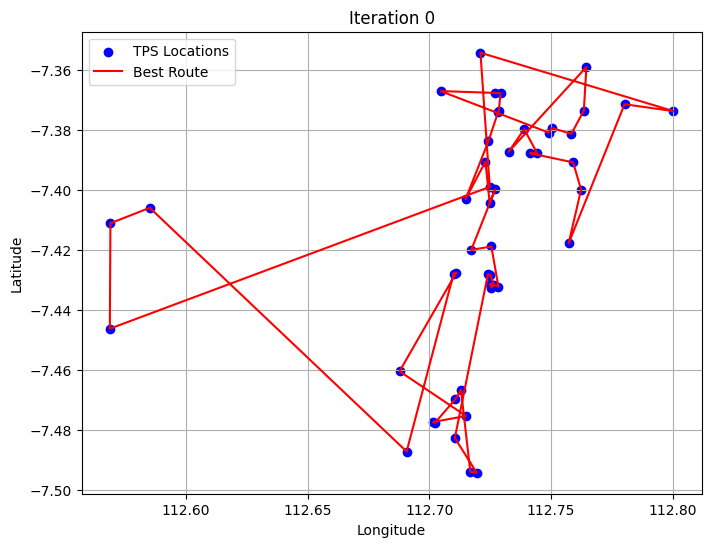

Iteration: 0 | Best Distance: 1.1564301336656642
Iteration: 10 | Best Distance: 0.9647057522670908
Iteration: 20 | Best Distance: 0.8979123693289652
Iteration: 30 | Best Distance: 0.8713028964408047
Iteration: 40 | Best Distance: 0.8417928606195918
Iteration: 50 | Best Distance: 0.8261209322878654
Iteration: 60 | Best Distance: 0.8132125953871872
Iteration: 70 | Best Distance: 0.8129343133244651
Iteration: 80 | Best Distance: 0.8129343133244651
Iteration: 90 | Best Distance: 0.8115782207479734


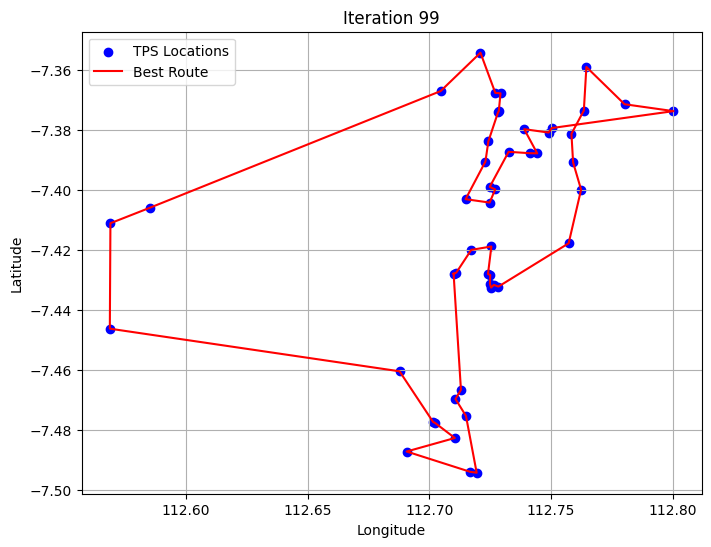

Best Distance: 0.8115782207479734
Best Route: ['Depot dummy', 'TPS Sidokerto Buduran', 'TPS Sukorejo Buduran', 'TPST PT Avian Buduran', 'TPS Pondok Al-Ghozini Buduran', 'Jl. KH Khamdani Buduran', 'SMP PGRI 1 Buduran', 'TPST Siwalanpanji Buduran', 'SMA Antartika Buduran', 'TPS SDN Siwalanpanji Buduran', 'TPS Perum Surya Asri (Dapurno) Buduran', 'TPS Perum Putri Juanda Waru', 'Sedati - Choirul Anan TPS Lesen', 'Sedati - Miskan TPS Bea Cukai Juanda', 'Sedati - TPS Pasar Wisata Juanda', 'Sedati - TPS Jl. Raya Tropodo', 'Sedati - TPS Bandara Juanda', 'Sedati - TPS Angkasapura', 'Sedati - TPS AURI', 'Sedati - TPS Jl. Raya Juanda', 'TPS Marinir Juanda Gedangan', 'TPS Hair Star Gedangan', 'TPS SMA Negeri Gedangan', 'TPS Desa Ketajen Gedangan', 'TPS Sungai Seruni Gedangan', 'TPS Indomart Gedangan', 'TPS Komplek AL Tebel Gedangan', 'TPS Karangbong Gedangan', 'TPST Kebonsikep Gedangan', 'TPS Alloy Stell Gedangan', 'TPS Restoran Aloha Gedangan', 'TPS Aloha Gedangan', 'TPS Sawotratap Gedangan', 'TP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.pheromone_evaporation_rate = pheromone_evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.tps_names = tps_names
        self.coordinates = coordinates
        self.num_nodes = len(coordinates)
        self.distances = self.calculate_distances()
        self.pheromone_matrix = np.ones((self.num_nodes, self.num_nodes))
        np.fill_diagonal(self.pheromone_matrix, 0)
        self.best_distance = float('inf')
        self.best_route = []

    def calculate_distances(self):
        distances = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                distances[i][j] = np.linalg.norm(self.coordinates[i] - self.coordinates[j])
        return distances

    def run(self):
        start_time = time.time()
        for iteration in range(self.num_iterations):
            ant_routes = []
            for ant in range(self.num_ants):
                route = self.generate_ant_route()
                ant_routes.append((route, self.calculate_route_distance(route)))

            self.update_pheromone(ant_routes)

            if iteration == 0:
                self.plot_route(iteration, ant_routes)
            elif iteration == self.num_iterations - 1:
                self.plot_route(iteration, ant_routes)

            if iteration % 10 == 0:
                print("Iteration:", iteration, "| Best Distance:", self.best_distance)

        print("Best Distance:", self.best_distance)
        print("Best Route:", self.best_route)
        end_time = time.time()
        print("Total Runtime:", end_time - start_time, "seconds")

    def plot_route(self, iteration, ant_routes):
        best_ant_route, _ = min(ant_routes, key=lambda x: x[1])
        best_route_coords = [self.coordinates[node] for node in best_ant_route]
        best_route_coords.append(self.coordinates[best_ant_route[0]])

        plt.figure(figsize=(8, 6))
        plt.scatter(self.coordinates[:, 1], self.coordinates[:, 0], c='blue', label='TPS Locations')
        plt.plot([coord[1] for coord in best_route_coords], [coord[0] for coord in best_route_coords],
                 c='red', linewidth=1.5, linestyle='-', label='Best Route')
        plt.title(f"Iteration {iteration}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.grid(True)
        plt.show()

    def generate_ant_route(self):
        start_node = 0  # Start from depot dummy
        unvisited_nodes = set(range(self.num_nodes))
        unvisited_nodes.remove(start_node)
        current_node = start_node
        route = [start_node]

        while unvisited_nodes:
            probabilities = self.calculate_probabilities(current_node, unvisited_nodes)
            next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
            route.append(next_node)
            unvisited_nodes.remove(next_node)
            current_node = next_node

        route.append(start_node)
        return route

    def calculate_probabilities(self, current_node, unvisited_nodes):
        pheromone_values = np.array([self.pheromone_matrix[current_node][i] for i in unvisited_nodes])
        distances = np.array([self.distances[current_node][i] for i in unvisited_nodes])
        heuristic_values = 1 / (distances + 1e-10)  # Add a small value to avoid division by zero
        probabilities = (pheromone_values ** self.alpha) * (heuristic_values ** self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    def calculate_route_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distances[route[i]][route[i + 1]]
        return distance

    def update_pheromone(self, ant_routes):
        # Evaporate pheromone
        self.pheromone_matrix *= (1 - self.pheromone_evaporation_rate)

        # Find best ant route
        best_ant_route, best_ant_distance = min(ant_routes, key=lambda x: x[1])

        # Update pheromone on the best route only
        for i in range(len(best_ant_route) - 1):
            current_node, next_node = best_ant_route[i], best_ant_route[i + 1]
            self.pheromone_matrix[current_node][next_node] += 1 / best_ant_distance

        # Update best distance and route if a better solution is found
        if best_ant_distance < self.best_distance:
            self.best_distance = best_ant_distance
            self.best_route = [self.tps_names[node] for node in best_ant_route]


if __name__ == "__main__":
    tps_names = [
        "Depot dummy", "TPS Sidokerto Buduran", "TPS Sukorejo Buduran", "TPST Siwalanpanji Buduran",
        "TPS SDN Siwalanpanji Buduran", "SMA Antartika Buduran", "TPST PT Avian Buduran", "SMP PGRI 1 Buduran",
        "TPS Pondok Al-Ghozini Buduran", "TPS Perum Surya Asri (Dapurno) Buduran", "Jl. KH Khamdani Buduran",
        "TPS Perum Candiloka Candi", "TPS Candi Asri Candi", "TPS Perum CSM Candi", "Terminal Larangan Candi",
        "TPS Tenggulunan Candi", "TPS Perum AL Candi", "TPS Ps. Krempyeng Sugihwaras Candi", "TPS Jl. Raya Bligo Candi",
        "TPS Kir Candi Candi", "TPS Jl Karang Tanjung Candi", "TPS Desa Ketajen Gedangan", "TPS Aloha Gedangan",
        "TPS Sungai Seruni Gedangan", "TPS Makro Gedangan", "TPS Hair Star Gedangan", "TPS Indomart Gedangan",
        "TPS Restoran Aloha Gedangan", "TPS Karangbong Gedangan", "TPST Kebonsikep Gedangan", "TPS Marinir Juanda Gedangan",
        "TPS Alloy Stell Gedangan", "TPS Sawotratap Gedangan", "TPS Gudang Garam Gedangan", "TPS Komplek AL Tebel Gedangan",
        "TPS SMA Negeri Gedangan", "TPS Perum Putri Juanda Waru", "TPS Taman Aloha Waru", "TPS Jl Raya Krian",
        "TPS Perum Citra Diamond Krian", "TPS Kemangsen Krian", "Sedati - TPS Angkasapura", "Sedati - TPS Bandara Juanda",
        "Sedati - TPS Jl. Raya Juanda", "Sedati - TPS Pasar Wisata Juanda", "Sedati - Miskan TPS Bea Cukai Juanda",
        "Sedati - TPS Jl. Raya Tropodo", "Sedati - Choirul Anan TPS Lesen", "Sedati - TPS AURI"
    ]

    coordinates = np.array([
        [-7.428, 112.710], [-7.427615, 112.711109], [-7.42004, 112.717253], [-7.4325987, 112.7254143],
        [-7.432267, 112.728402], [-7.431704, 112.726543], [-7.418909, 112.725523], [-7.431318, 112.724925],
        [-7.4281, 112.724118], [-7.417853, 112.757257], [-7.428407, 112.725056], [-7.494257, 112.719477],
        [-7.493967, 112.7168725], [-7.460478, 112.687796], [-7.466627, 112.71302], [-7.46971, 112.71078],
        [-7.477639, 112.702337], [-7.477367, 112.701596], [-7.475349, 112.71509], [-7.4826914, 112.7105095],
        [-7.487192, 112.690701], [-7.387379, 112.732604], [-7.373912, 112.728558], [-7.399051, 112.724847],
        [-7.367755, 112.727134], [-7.387904, 112.744354], [-7.399895, 112.727094], [-7.3742506, 112.7282426],
        [-7.403149, 112.714927], [-7.390629, 112.723074], [-7.3798339, 112.7390049], [-7.3839035, 112.7242795],
        [-7.367898, 112.72927], [-7.3543774, 112.7210301], [-7.4042878, 112.7248046], [-7.387845, 112.741398],
        [-7.3999753, 112.7623732], [-7.367158, 112.704671], [-7.406027, 112.585173], [-7.4462837, 112.5687863],
        [-7.411169, 112.569028], [-7.373831, 112.800322], [-7.371533, 112.780227], [-7.380967, 112.749007],
        [-7.373621, 112.763504], [-7.381391, 112.758408], [-7.359124, 112.764548], [-7.390902, 112.759091],
        [-7.379465, 112.750342]
    ])

    num_ants = 80
    num_iterations = 100
    pheromone_evaporation_rate = 0.05
    alpha = 1
    beta = 2

    ant_colony = AntColony(num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates)
    ant_colony.run()


**MAX-MIN**

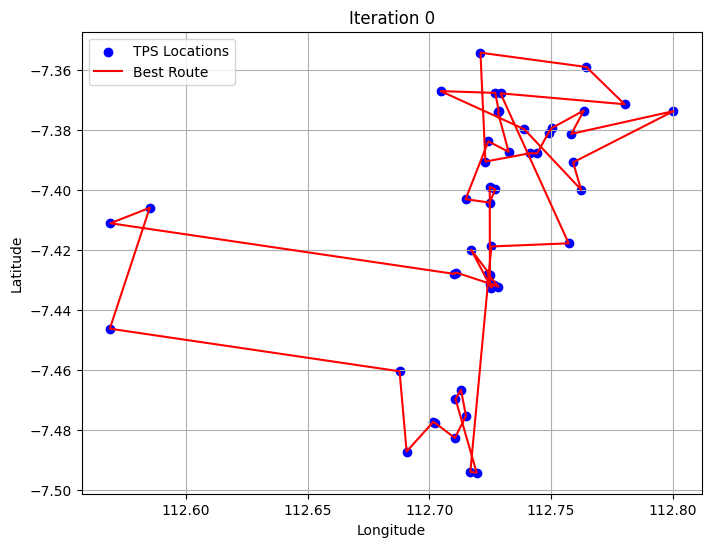

Iteration: 0 | Best Distance: 1.1384967794221912
Iteration: 10 | Best Distance: 0.9993255330879471
Iteration: 20 | Best Distance: 0.8822836089893894
Iteration: 30 | Best Distance: 0.8661892916761391
Iteration: 40 | Best Distance: 0.825613240027388
Iteration: 50 | Best Distance: 0.8169591462248118
Iteration: 60 | Best Distance: 0.8145442335680804
Iteration: 70 | Best Distance: 0.8075771439656454
Iteration: 80 | Best Distance: 0.8075771439656454
Iteration: 90 | Best Distance: 0.8075771439656454


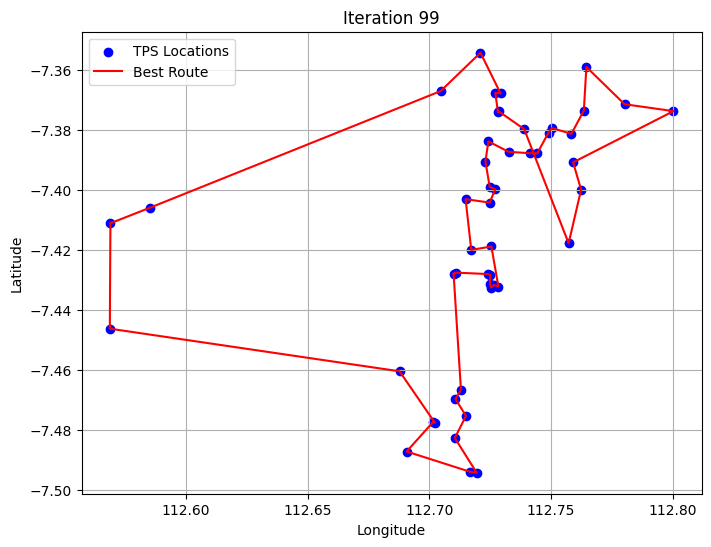

Best Distance: 0.8075771439656454
Best Route: ['Depot dummy', 'TPS Sidokerto Buduran', 'TPS Pondok Al-Ghozini Buduran', 'Jl. KH Khamdani Buduran', 'SMP PGRI 1 Buduran', 'TPST Siwalanpanji Buduran', 'SMA Antartika Buduran', 'TPS SDN Siwalanpanji Buduran', 'TPST PT Avian Buduran', 'TPS Sukorejo Buduran', 'TPS Jl. Raya Manyar Gedangan', 'TPS Brawijaya Waru', 'TPS Jl. Pahlawan Gedangan', 'TPS Sungai Seruni Gedangan', 'TPS Sangivara Candi', 'TPS Punggul Candi', 'TPS Desa Ketajen Gedangan', 'TPS Pasar Puri Candi', 'TPS Tanggulangin', 'TPS Jl. Raya Tropodo Gedangan', 'TPS Jl. Krembangan Dalam Gedangan', 'TPS Antasari Waru', 'TPS Perum Surya Asri (Dapurno) Buduran', 'TPS Hair Star Gedangan', 'TPS Candi II Waru', 'TPS DK Tanjung Gedangan', 'TPS Aloha Gedangan', 'TPS Waru', 'TPS Makro Gedangan', 'TPS Pandanrejo Waru', 'TPS Buduran', 'TPS Buduran 2', 'TPS Waru Sukodono', 'TPS Petemon Waru', 'TPS Perum CSM Candi', 'TPS Perum AL Candi', 'TPS Ps. Krempyeng Sugihwaras Candi', 'TPS Jl Karang Tanjung C

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates, min_pheromone, max_pheromone):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.pheromone_evaporation_rate = pheromone_evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.tps_names = tps_names
        self.coordinates = coordinates
        self.num_nodes = len(coordinates)
        self.distances = self.calculate_distances()
        self.pheromone_matrix = np.ones((self.num_nodes, self.num_nodes))
        np.fill_diagonal(self.pheromone_matrix, 0)
        self.best_distance = float('inf')
        self.best_route = []
        self.min_pheromone = min_pheromone
        self.max_pheromone = max_pheromone

    def calculate_distances(self):
        distances = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                distances[i][j] = np.linalg.norm(self.coordinates[i] - self.coordinates[j])
        return distances

    def run(self):
        start_time = time.time()
        for iteration in range(self.num_iterations):
            ant_routes = []
            for ant in range(self.num_ants):
                route = self.generate_ant_route()
                ant_routes.append((route, self.calculate_route_distance(route)))

            self.update_pheromone(ant_routes, self.min_pheromone, self.max_pheromone)

            if iteration == 0 or iteration == self.num_iterations - 1:
                self.plot_route(iteration, ant_routes)

            if iteration % 10 == 0:
                print("Iteration:", iteration, "| Best Distance:", self.best_distance)

        print("Best Distance:", self.best_distance)
        print("Best Route:", self.best_route)
        end_time = time.time()
        print("Total Runtime:", end_time - start_time, "seconds")

    def plot_route(self, iteration, ant_routes):
        best_ant_route, _ = min(ant_routes, key=lambda x: x[1])
        best_route_coords = [self.coordinates[node] for node in best_ant_route]
        best_route_coords.append(self.coordinates[best_ant_route[0]])

        plt.figure(figsize=(8, 6))
        plt.scatter(self.coordinates[:, 1], self.coordinates[:, 0], c='blue', label='TPS Locations')
        plt.plot([coord[1] for coord in best_route_coords], [coord[0] for coord in best_route_coords],
                 c='red', linewidth=1.5, linestyle='-', label='Best Route')
        plt.title(f"Iteration {iteration}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.grid(True)
        plt.show()

    def generate_ant_route(self):
        start_node = 0  # Start from depot dummy
        unvisited_nodes = set(range(self.num_nodes))
        unvisited_nodes.remove(start_node)
        current_node = start_node
        route = [start_node]

        while unvisited_nodes:
            probabilities = self.calculate_probabilities(current_node, unvisited_nodes)
            next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
            route.append(next_node)
            unvisited_nodes.remove(next_node)
            current_node = next_node

        route.append(start_node)
        return route

    def calculate_probabilities(self, current_node, unvisited_nodes):
        pheromone_values = np.array([self.pheromone_matrix[current_node][i] for i in unvisited_nodes])
        distances = np.array([self.distances[current_node][i] for i in unvisited_nodes])
        heuristic_values = 1 / (distances + 1e-10)  # Add a small value to avoid division by zero
        probabilities = (pheromone_values ** self.alpha) * (heuristic_values ** self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    def calculate_route_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distances[route[i]][route[i + 1]]
        return distance

    def update_pheromone(self, ant_routes, min_pheromone, max_pheromone):
        # Evaporate pheromone
        self.pheromone_matrix *= (1 - self.pheromone_evaporation_rate)

        # Find best ant route
        best_ant_route, best_ant_distance = min(ant_routes, key=lambda x: x[1])

        # Update pheromone on the best route only
        for i in range(len(best_ant_route) - 1):
            current_node, next_node = best_ant_route[i], best_ant_route[i + 1]
            self.pheromone_matrix[current_node][next_node] += 1 / best_ant_distance

        # Limit pheromone values to min_pheromone and max_pheromone
        self.pheromone_matrix[self.pheromone_matrix < min_pheromone] = min_pheromone
        self.pheromone_matrix[self.pheromone_matrix > max_pheromone] = max_pheromone

        # Update best distance and route if a better solution is found
        if best_ant_distance < self.best_distance:
            self.best_distance = best_ant_distance
            self.best_route = [self.tps_names[node] for node in best_ant_route if node < len(self.tps_names)]


if __name__ == "__main__":
    tps_names = [
        "Depot dummy", "TPS Sidokerto Buduran", "TPS Sukorejo Buduran", "TPST Siwalanpanji Buduran",
        "TPS SDN Siwalanpanji Buduran", "SMA Antartika Buduran", "TPST PT Avian Buduran", "SMP PGRI 1 Buduran",
        "TPS Pondok Al-Ghozini Buduran", "TPS Perum Surya Asri (Dapurno) Buduran", "Jl. KH Khamdani Buduran",
        "TPS Perum Candiloka Candi", "TPS Candi Asri Candi", "TPS Perum CSM Candi", "Terminal Larangan Candi",
        "TPS Tenggulunan Candi", "TPS Perum AL Candi", "TPS Ps. Krempyeng Sugihwaras Candi", "TPS Jl. Raya Bligo Candi",
        "TPS Kir Candi Candi", "TPS Jl Karang Tanjung Candi", "TPS Desa Ketajen Gedangan", "TPS Aloha Gedangan",
        "TPS Sungai Seruni Gedangan", "TPS Makro Gedangan", "TPS Hair Star Gedangan", "TPS Jl. Pahlawan Gedangan",
        "TPS DK Tanjung Gedangan", "TPS Jl. Raya Manyar Gedangan", "TPS Sangivara Candi", "TPS Pasar Puri Candi",
        "TPS Punggul Candi", "TPS Waru", "TPS Pandanrejo Waru", "TPS Brawijaya Waru", "TPS Candi II Waru",
        "TPS Antasari Waru", "TPS Buduran", "TPS Buduran 2", "TPS Petemon Waru", "TPS Waru Sukodono",
        "TPS Jl. Krembangan Dalam Gedangan", "TPS Jl. Raya Tropodo Gedangan", "TPS Tanggulangin"
    ]

    coordinates = np.array([
        [-7.428, 112.710], [-7.427615, 112.711109], [-7.42004, 112.717253], [-7.4325987, 112.7254143],
        [-7.432267, 112.728402], [-7.431704, 112.726543], [-7.418909, 112.725523], [-7.431318, 112.724925],
        [-7.4281, 112.724118], [-7.417853, 112.757257], [-7.428407, 112.725056], [-7.494257, 112.719477],
        [-7.493967, 112.7168725], [-7.460478, 112.687796], [-7.466627, 112.71302], [-7.46971, 112.71078],
        [-7.477639, 112.702337], [-7.477367, 112.701596], [-7.475349, 112.71509], [-7.4826914, 112.7105095],
        [-7.487192, 112.690701], [-7.387379, 112.732604], [-7.373912, 112.728558], [-7.399051, 112.724847],
        [-7.367755, 112.727134], [-7.387904, 112.744354], [-7.399895, 112.727094], [-7.3742506, 112.7282426],
        [-7.403149, 112.714927], [-7.390629, 112.723074], [-7.3798339, 112.7390049], [-7.3839035, 112.7242795],
        [-7.367898, 112.72927], [-7.3543774, 112.7210301], [-7.4042878, 112.7248046], [-7.387845, 112.741398],
        [-7.3999753, 112.7623732], [-7.367158, 112.704671], [-7.406027, 112.585173], [-7.4462837, 112.5687863],
        [-7.411169, 112.569028], [-7.373831, 112.800322], [-7.371533, 112.780227], [-7.380967, 112.749007],
        [-7.373621, 112.763504], [-7.381391, 112.758408], [-7.359124, 112.764548], [-7.390902, 112.759091],
        [-7.379465, 112.750342]
    ])

    num_ants = 80
    num_iterations = 100
    pheromone_evaporation_rate = 0.05
    alpha = 1
    beta = 2
    min_pheromone = 0.1
    max_pheromone = 10

    colony = AntColony(num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates, min_pheromone, max_pheromone)
    colony.run()

PERCOBAAN MAX-MIN DENGAN PARAMETER YANG BERBEDA

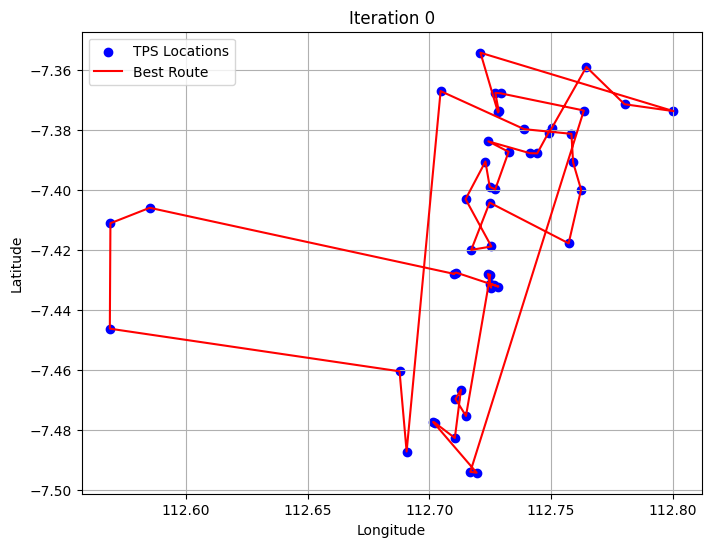

Iteration: 0 | Best Distance: 1.1827362946426103
Iteration: 10 | Best Distance: 0.9631723288362298
Iteration: 20 | Best Distance: 0.9175574026424504
Iteration: 30 | Best Distance: 0.9060721797378484
Iteration: 40 | Best Distance: 0.8860660246233867
Iteration: 50 | Best Distance: 0.8480364848234458
Iteration: 60 | Best Distance: 0.8370424662160392
Iteration: 70 | Best Distance: 0.8370424662160392
Iteration: 80 | Best Distance: 0.8319920761953523
Iteration: 90 | Best Distance: 0.8261738455092436


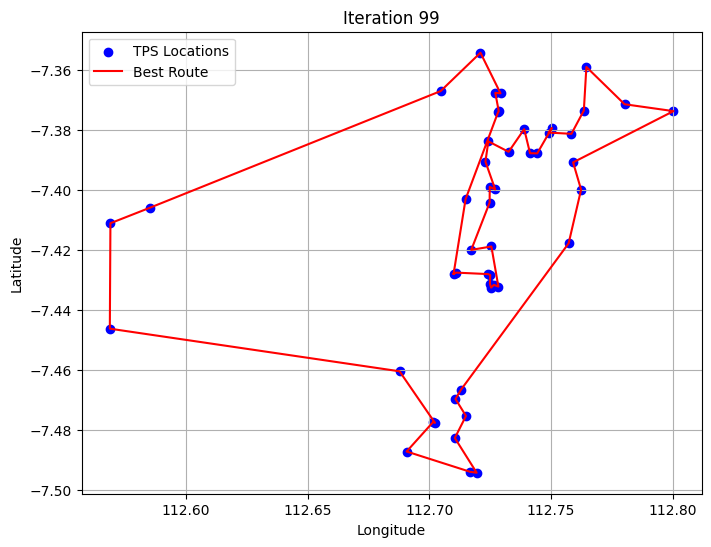

Best Distance: 0.8173587306121637
Best Route: ['Depot dummy', 'TPS Sidokerto Buduran', 'TPS Sukorejo Buduran', 'TPST PT Avian Buduran', 'Jl. KH Khamdani Buduran', 'TPS Pondok Al-Ghozini Buduran', 'SMP PGRI 1 Buduran', 'TPST Siwalanpanji Buduran', 'SMA Antartika Buduran', 'TPS SDN Siwalanpanji Buduran', 'Terminal Larangan Candi', 'TPS Tenggulunan Candi', 'TPS Jl. Raya Bligo Candi', 'TPS Kir Candi Candi', 'TPS Candi Asri Candi', 'TPS Perum Candiloka Candi', 'TPS Jl Karang Tanjung Candi', 'TPS Ps. Krempyeng Sugihwaras Candi', 'TPS Perum AL Candi', 'TPS Perum CSM Candi', 'TPS Petemon Waru', 'TPS Waru Sukodono', 'TPS Buduran 2', 'TPS Buduran', 'TPS Pandanrejo Waru', 'TPS Waru', 'TPS Makro Gedangan', 'TPS Aloha Gedangan', 'TPS DK Tanjung Gedangan', 'TPS Punggul Candi', 'TPS Desa Ketajen Gedangan', 'TPS Pasar Puri Candi', 'TPS Candi II Waru', 'TPS Hair Star Gedangan', 'TPS Tanggulangin', 'TPS Jl. Raya Tropodo Gedangan', 'TPS Jl. Krembangan Dalam Gedangan', 'TPS Antasari Waru', 'TPS Perum Sury

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates, min_pheromone, max_pheromone):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.pheromone_evaporation_rate = pheromone_evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.tps_names = tps_names
        self.coordinates = coordinates
        self.num_nodes = len(coordinates)
        self.distances = self.calculate_distances()
        self.pheromone_matrix = np.ones((self.num_nodes, self.num_nodes))
        np.fill_diagonal(self.pheromone_matrix, 0)
        self.best_distance = float('inf')
        self.best_route = []
        self.min_pheromone = min_pheromone
        self.max_pheromone = max_pheromone

    def calculate_distances(self):
        distances = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                distances[i][j] = np.linalg.norm(self.coordinates[i] - self.coordinates[j])
        return distances

    def run(self):
        start_time = time.time()
        for iteration in range(self.num_iterations):
            ant_routes = []
            for ant in range(self.num_ants):
                route = self.generate_ant_route()
                ant_routes.append((route, self.calculate_route_distance(route)))

            self.update_pheromone(ant_routes, self.min_pheromone, self.max_pheromone)

            if iteration == 0 or iteration == self.num_iterations - 1:
                self.plot_route(iteration, ant_routes)

            if iteration % 10 == 0:
                print("Iteration:", iteration, "| Best Distance:", self.best_distance)

        print("Best Distance:", self.best_distance)
        print("Best Route:", self.best_route)
        end_time = time.time()
        print("Total Runtime:", end_time - start_time, "seconds")

    def plot_route(self, iteration, ant_routes):
        best_ant_route, _ = min(ant_routes, key=lambda x: x[1])
        best_route_coords = [self.coordinates[node] for node in best_ant_route]
        best_route_coords.append(self.coordinates[best_ant_route[0]])

        plt.figure(figsize=(8, 6))
        plt.scatter(self.coordinates[:, 1], self.coordinates[:, 0], c='blue', label='TPS Locations')
        plt.plot([coord[1] for coord in best_route_coords], [coord[0] for coord in best_route_coords],
                 c='red', linewidth=1.5, linestyle='-', label='Best Route')
        plt.title(f"Iteration {iteration}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.grid(True)
        plt.show()

    def generate_ant_route(self):
        start_node = 0  # Start from depot dummy
        unvisited_nodes = set(range(self.num_nodes))
        unvisited_nodes.remove(start_node)
        current_node = start_node
        route = [start_node]

        while unvisited_nodes:
            probabilities = self.calculate_probabilities(current_node, unvisited_nodes)
            next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
            route.append(next_node)
            unvisited_nodes.remove(next_node)
            current_node = next_node

        route.append(start_node)
        return route

    def calculate_probabilities(self, current_node, unvisited_nodes):
        pheromone_values = np.array([self.pheromone_matrix[current_node][i] for i in unvisited_nodes])
        distances = np.array([self.distances[current_node][i] for i in unvisited_nodes])
        heuristic_values = 1 / (distances + 1e-10)  # Add a small value to avoid division by zero
        probabilities = (pheromone_values ** self.alpha) * (heuristic_values ** self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    def calculate_route_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distances[route[i]][route[i + 1]]
        return distance

    def update_pheromone(self, ant_routes, min_pheromone, max_pheromone):
        # Evaporate pheromone
        self.pheromone_matrix *= (1 - self.pheromone_evaporation_rate)

        # Find best ant route
        best_ant_route, best_ant_distance = min(ant_routes, key=lambda x: x[1])

        # Update pheromone on the best route only
        for i in range(len(best_ant_route) - 1):
            current_node, next_node = best_ant_route[i], best_ant_route[i + 1]
            self.pheromone_matrix[current_node][next_node] += 1 / best_ant_distance

        # Limit pheromone values to min_pheromone and max_pheromone
        self.pheromone_matrix[self.pheromone_matrix < min_pheromone] = min_pheromone
        self.pheromone_matrix[self.pheromone_matrix > max_pheromone] = max_pheromone

        # Update best distance and route if a better solution is found
        if best_ant_distance < self.best_distance:
            self.best_distance = best_ant_distance
            self.best_route = [self.tps_names[node] for node in best_ant_route if node < len(self.tps_names)]


if __name__ == "__main__":
    tps_names = [
        "Depot dummy", "TPS Sidokerto Buduran", "TPS Sukorejo Buduran", "TPST Siwalanpanji Buduran",
        "TPS SDN Siwalanpanji Buduran", "SMA Antartika Buduran", "TPST PT Avian Buduran", "SMP PGRI 1 Buduran",
        "TPS Pondok Al-Ghozini Buduran", "TPS Perum Surya Asri (Dapurno) Buduran", "Jl. KH Khamdani Buduran",
        "TPS Perum Candiloka Candi", "TPS Candi Asri Candi", "TPS Perum CSM Candi", "Terminal Larangan Candi",
        "TPS Tenggulunan Candi", "TPS Perum AL Candi", "TPS Ps. Krempyeng Sugihwaras Candi", "TPS Jl. Raya Bligo Candi",
        "TPS Kir Candi Candi", "TPS Jl Karang Tanjung Candi", "TPS Desa Ketajen Gedangan", "TPS Aloha Gedangan",
        "TPS Sungai Seruni Gedangan", "TPS Makro Gedangan", "TPS Hair Star Gedangan", "TPS Jl. Pahlawan Gedangan",
        "TPS DK Tanjung Gedangan", "TPS Jl. Raya Manyar Gedangan", "TPS Sangivara Candi", "TPS Pasar Puri Candi",
        "TPS Punggul Candi", "TPS Waru", "TPS Pandanrejo Waru", "TPS Brawijaya Waru", "TPS Candi II Waru",
        "TPS Antasari Waru", "TPS Buduran", "TPS Buduran 2", "TPS Petemon Waru", "TPS Waru Sukodono",
        "TPS Jl. Krembangan Dalam Gedangan", "TPS Jl. Raya Tropodo Gedangan", "TPS Tanggulangin"
    ]

    coordinates = np.array([
        [-7.428, 112.710], [-7.427615, 112.711109], [-7.42004, 112.717253], [-7.4325987, 112.7254143],
        [-7.432267, 112.728402], [-7.431704, 112.726543], [-7.418909, 112.725523], [-7.431318, 112.724925],
        [-7.4281, 112.724118], [-7.417853, 112.757257], [-7.428407, 112.725056], [-7.494257, 112.719477],
        [-7.493967, 112.7168725], [-7.460478, 112.687796], [-7.466627, 112.71302], [-7.46971, 112.71078],
        [-7.477639, 112.702337], [-7.477367, 112.701596], [-7.475349, 112.71509], [-7.4826914, 112.7105095],
        [-7.487192, 112.690701], [-7.387379, 112.732604], [-7.373912, 112.728558], [-7.399051, 112.724847],
        [-7.367755, 112.727134], [-7.387904, 112.744354], [-7.399895, 112.727094], [-7.3742506, 112.7282426],
        [-7.403149, 112.714927], [-7.390629, 112.723074], [-7.3798339, 112.7390049], [-7.3839035, 112.7242795],
        [-7.367898, 112.72927], [-7.3543774, 112.7210301], [-7.4042878, 112.7248046], [-7.387845, 112.741398],
        [-7.3999753, 112.7623732], [-7.367158, 112.704671], [-7.406027, 112.585173], [-7.4462837, 112.5687863],
        [-7.411169, 112.569028], [-7.373831, 112.800322], [-7.371533, 112.780227], [-7.380967, 112.749007],
        [-7.373621, 112.763504], [-7.381391, 112.758408], [-7.359124, 112.764548], [-7.390902, 112.759091],
        [-7.379465, 112.750342]
    ])

    num_ants = 50
    num_iterations = 100
    pheromone_evaporation_rate = 0.05
    alpha = 1
    beta = 2
    min_pheromone = 0.1
    max_pheromone = 10

    colony = AntColony(num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates, min_pheromone, max_pheromone)
    colony.run()

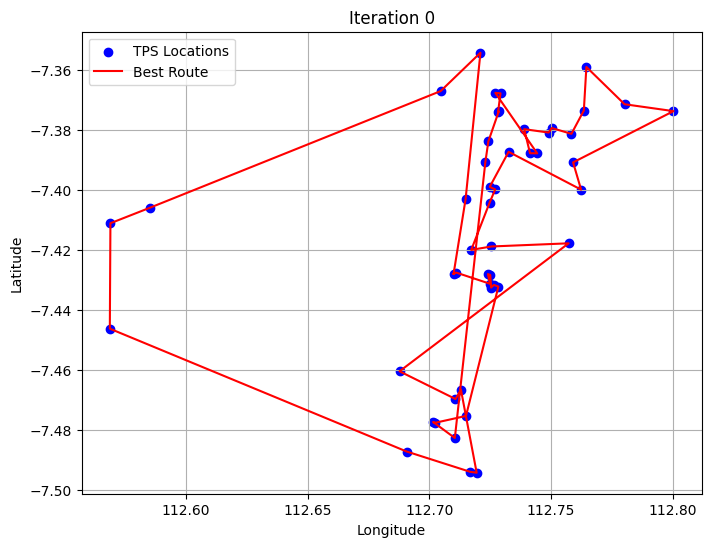

Iteration: 0 | Best Distance: 1.0736888401707967
Iteration: 10 | Best Distance: 1.0289294391684913
Iteration: 20 | Best Distance: 0.9940363547583098
Iteration: 30 | Best Distance: 0.947217744812886
Iteration: 40 | Best Distance: 0.9397832906219452
Iteration: 50 | Best Distance: 0.9030197245742109
Iteration: 60 | Best Distance: 0.9030197245742109
Iteration: 70 | Best Distance: 0.9030197245742109


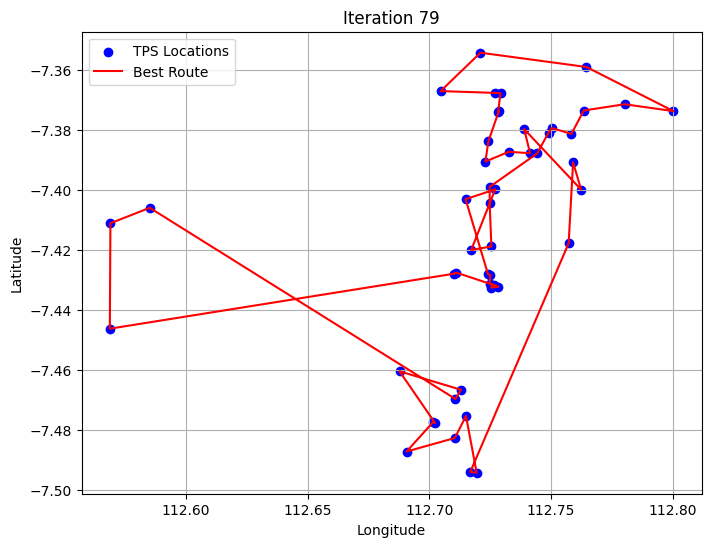

Best Distance: 0.9030197245742109
Best Route: ['Depot dummy', 'TPS Sidokerto Buduran', 'TPST Siwalanpanji Buduran', 'SMA Antartika Buduran', 'TPS SDN Siwalanpanji Buduran', 'Jl. KH Khamdani Buduran', 'TPS Pondok Al-Ghozini Buduran', 'TPST PT Avian Buduran', 'TPS Sukorejo Buduran', 'SMP PGRI 1 Buduran', 'TPS Brawijaya Waru', 'TPS Sungai Seruni Gedangan', 'TPS Jl. Pahlawan Gedangan', 'TPS Sangivara Candi', 'TPS Punggul Candi', 'TPS DK Tanjung Gedangan', 'TPS Aloha Gedangan', 'TPS Waru', 'TPS Makro Gedangan', 'TPS Pandanrejo Waru', 'TPS Buduran', 'TPS Desa Ketajen Gedangan', 'TPS Pasar Puri Candi', 'TPS Candi II Waru', 'TPS Hair Star Gedangan', 'TPS Tanggulangin', 'TPS Jl. Raya Tropodo Gedangan', 'TPS Jl. Krembangan Dalam Gedangan', 'TPS Antasari Waru', 'TPS Perum Surya Asri (Dapurno) Buduran', 'TPS Jl. Raya Bligo Candi', 'TPS Kir Candi Candi', 'TPS Perum AL Candi', 'TPS Ps. Krempyeng Sugihwaras Candi', 'TPS Tenggulunan Candi', 'Terminal Larangan Candi', 'TPS Candi Asri Candi', 'TPS Perum

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates, min_pheromone, max_pheromone):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.pheromone_evaporation_rate = pheromone_evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.tps_names = tps_names
        self.coordinates = coordinates
        self.num_nodes = len(coordinates)
        self.distances = self.calculate_distances()
        self.pheromone_matrix = np.ones((self.num_nodes, self.num_nodes))
        np.fill_diagonal(self.pheromone_matrix, 0)
        self.best_distance = float('inf')
        self.best_route = []
        self.min_pheromone = min_pheromone
        self.max_pheromone = max_pheromone

    def calculate_distances(self):
        distances = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                distances[i][j] = np.linalg.norm(self.coordinates[i] - self.coordinates[j])
        return distances

    def run(self):
        start_time = time.time()
        for iteration in range(self.num_iterations):
            ant_routes = []
            for ant in range(self.num_ants):
                route = self.generate_ant_route()
                ant_routes.append((route, self.calculate_route_distance(route)))

            self.update_pheromone(ant_routes, self.min_pheromone, self.max_pheromone)

            if iteration == 0 or iteration == self.num_iterations - 1:
                self.plot_route(iteration, ant_routes)

            if iteration % 10 == 0:
                print("Iteration:", iteration, "| Best Distance:", self.best_distance)

        print("Best Distance:", self.best_distance)
        print("Best Route:", self.best_route)
        end_time = time.time()
        print("Total Runtime:", end_time - start_time, "seconds")

    def plot_route(self, iteration, ant_routes):
        best_ant_route, _ = min(ant_routes, key=lambda x: x[1])
        best_route_coords = [self.coordinates[node] for node in best_ant_route]
        best_route_coords.append(self.coordinates[best_ant_route[0]])

        plt.figure(figsize=(8, 6))
        plt.scatter(self.coordinates[:, 1], self.coordinates[:, 0], c='blue', label='TPS Locations')
        plt.plot([coord[1] for coord in best_route_coords], [coord[0] for coord in best_route_coords],
                 c='red', linewidth=1.5, linestyle='-', label='Best Route')
        plt.title(f"Iteration {iteration}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.grid(True)
        plt.show()

    def generate_ant_route(self):
        start_node = 0  # Start from depot dummy
        unvisited_nodes = set(range(self.num_nodes))
        unvisited_nodes.remove(start_node)
        current_node = start_node
        route = [start_node]

        while unvisited_nodes:
            probabilities = self.calculate_probabilities(current_node, unvisited_nodes)
            next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
            route.append(next_node)
            unvisited_nodes.remove(next_node)
            current_node = next_node

        route.append(start_node)
        return route

    def calculate_probabilities(self, current_node, unvisited_nodes):
        pheromone_values = np.array([self.pheromone_matrix[current_node][i] for i in unvisited_nodes])
        distances = np.array([self.distances[current_node][i] for i in unvisited_nodes])
        heuristic_values = 1 / (distances + 1e-10)  # Add a small value to avoid division by zero
        probabilities = (pheromone_values ** self.alpha) * (heuristic_values ** self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    def calculate_route_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distances[route[i]][route[i + 1]]
        return distance

    def update_pheromone(self, ant_routes, min_pheromone, max_pheromone):
        # Evaporate pheromone
        self.pheromone_matrix *= (1 - self.pheromone_evaporation_rate)

        # Find best ant route
        best_ant_route, best_ant_distance = min(ant_routes, key=lambda x: x[1])

        # Update pheromone on the best route only
        for i in range(len(best_ant_route) - 1):
            current_node, next_node = best_ant_route[i], best_ant_route[i + 1]
            self.pheromone_matrix[current_node][next_node] += 1 / best_ant_distance

        # Limit pheromone values to min_pheromone and max_pheromone
        self.pheromone_matrix[self.pheromone_matrix < min_pheromone] = min_pheromone
        self.pheromone_matrix[self.pheromone_matrix > max_pheromone] = max_pheromone

        # Update best distance and route if a better solution is found
        if best_ant_distance < self.best_distance:
            self.best_distance = best_ant_distance
            self.best_route = [self.tps_names[node] for node in best_ant_route if node < len(self.tps_names)]


if __name__ == "__main__":
    tps_names = [
        "Depot dummy", "TPS Sidokerto Buduran", "TPS Sukorejo Buduran", "TPST Siwalanpanji Buduran",
        "TPS SDN Siwalanpanji Buduran", "SMA Antartika Buduran", "TPST PT Avian Buduran", "SMP PGRI 1 Buduran",
        "TPS Pondok Al-Ghozini Buduran", "TPS Perum Surya Asri (Dapurno) Buduran", "Jl. KH Khamdani Buduran",
        "TPS Perum Candiloka Candi", "TPS Candi Asri Candi", "TPS Perum CSM Candi", "Terminal Larangan Candi",
        "TPS Tenggulunan Candi", "TPS Perum AL Candi", "TPS Ps. Krempyeng Sugihwaras Candi", "TPS Jl. Raya Bligo Candi",
        "TPS Kir Candi Candi", "TPS Jl Karang Tanjung Candi", "TPS Desa Ketajen Gedangan", "TPS Aloha Gedangan",
        "TPS Sungai Seruni Gedangan", "TPS Makro Gedangan", "TPS Hair Star Gedangan", "TPS Jl. Pahlawan Gedangan",
        "TPS DK Tanjung Gedangan", "TPS Jl. Raya Manyar Gedangan", "TPS Sangivara Candi", "TPS Pasar Puri Candi",
        "TPS Punggul Candi", "TPS Waru", "TPS Pandanrejo Waru", "TPS Brawijaya Waru", "TPS Candi II Waru",
        "TPS Antasari Waru", "TPS Buduran", "TPS Buduran 2", "TPS Petemon Waru", "TPS Waru Sukodono",
        "TPS Jl. Krembangan Dalam Gedangan", "TPS Jl. Raya Tropodo Gedangan", "TPS Tanggulangin"
    ]

    coordinates = np.array([
        [-7.428, 112.710], [-7.427615, 112.711109], [-7.42004, 112.717253], [-7.4325987, 112.7254143],
        [-7.432267, 112.728402], [-7.431704, 112.726543], [-7.418909, 112.725523], [-7.431318, 112.724925],
        [-7.4281, 112.724118], [-7.417853, 112.757257], [-7.428407, 112.725056], [-7.494257, 112.719477],
        [-7.493967, 112.7168725], [-7.460478, 112.687796], [-7.466627, 112.71302], [-7.46971, 112.71078],
        [-7.477639, 112.702337], [-7.477367, 112.701596], [-7.475349, 112.71509], [-7.4826914, 112.7105095],
        [-7.487192, 112.690701], [-7.387379, 112.732604], [-7.373912, 112.728558], [-7.399051, 112.724847],
        [-7.367755, 112.727134], [-7.387904, 112.744354], [-7.399895, 112.727094], [-7.3742506, 112.7282426],
        [-7.403149, 112.714927], [-7.390629, 112.723074], [-7.3798339, 112.7390049], [-7.3839035, 112.7242795],
        [-7.367898, 112.72927], [-7.3543774, 112.7210301], [-7.4042878, 112.7248046], [-7.387845, 112.741398],
        [-7.3999753, 112.7623732], [-7.367158, 112.704671], [-7.406027, 112.585173], [-7.4462837, 112.5687863],
        [-7.411169, 112.569028], [-7.373831, 112.800322], [-7.371533, 112.780227], [-7.380967, 112.749007],
        [-7.373621, 112.763504], [-7.381391, 112.758408], [-7.359124, 112.764548], [-7.390902, 112.759091],
        [-7.379465, 112.750342]
    ])

    num_ants = 80
    num_iterations = 80
    pheromone_evaporation_rate = 0.05
    alpha = 1
    beta = 2
    min_pheromone = 1
    max_pheromone = 10

    colony = AntColony(num_ants, num_iterations, pheromone_evaporation_rate, alpha, beta, tps_names, coordinates, min_pheromone, max_pheromone)
    colony.run()